# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [141]:
# data url
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [142]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [143]:
unique_item_quantity = chipo.groupby(chipo['item_name']).sum()
unique_item_quantity.drop(['order_id'], axis=1, inplace=True)
unique_item_quantity.sort_values('quantity', ascending=False, inplace=True)
top5_items = unique_item_quantity.iloc[0:5]
top5_items

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [144]:
# Step 5 asks for histogram but actually requires a BAR plot

In [145]:
x = top5_items.index
x

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink'],
      dtype='object', name='item_name')

In [146]:
y = top5_items['quantity'].values
y

array([761, 591, 506, 386, 351], dtype=int64)

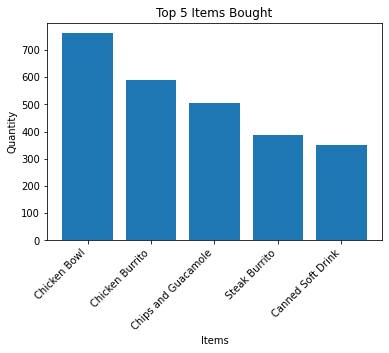

In [147]:
plt.bar(x, y)

plt.xlabel('Items')
plt.ylabel('Quantity')
plt.title('Top 5 Items Bought')

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [148]:
# convert item_price to float number
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [152]:
order_quantity_price = chipo.drop(['item_name', 'choice_description'], axis=1)

In [154]:
order_quantity_price = order_quantity_price.groupby('order_id').sum()
order_quantity_price

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


In [157]:
x = order_quantity_price['item_price'].values
y = order_quantity_price['quantity'].values

Text(0.5, 1.0, 'Number of Items Ordered Per Order Price')

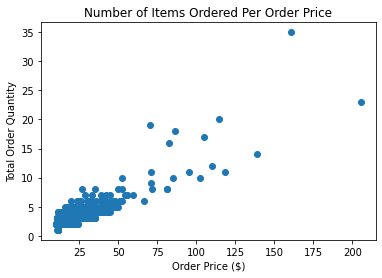

In [159]:
plt.scatter(x, y)

plt.xlabel('Order Price ($)')
plt.ylabel('Total Order Quantity')
plt.title('Number of Items Ordered Per Order Price')

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [160]:
order_quantity_price.max()

quantity       35.00
item_price    205.25
dtype: float64

In [165]:
order_quantity_price[order_quantity_price['item_price'] == order_quantity_price['item_price'].max()]

,quantity,item_price
order_id,,
926,23,205.25


In [166]:
pip list

Package            Version
------------------ ---------
argon2-cffi        20.1.0
attrs              19.3.0
backcall           0.2.0
bleach             3.1.5
certifi            2020.6.20
cffi               1.14.2
chardet            3.0.4
colorama           0.4.3
cycler             0.10.0
decorator          4.4.2
defusedxml         0.6.0
entrypoints        0.3
idna               2.10
ipykernel          5.3.4
ipython            7.17.0
ipython-genutils   0.2.0
ipywidgets         7.5.1
jedi               0.17.2
Jinja2             2.11.2
jsonschema         3.2.0
jupyter            1.0.0
jupyter-client     6.1.6
jupyter-console    6.1.0
jupyter-core       4.6.3
kiwisolver         1.2.0
MarkupSafe         1.1.1
matplotlib         3.3.1
mistune            0.8.4
nbconvert          5.6.1
nbformat           5.0.7
notebook           6.1.3
numpy              1.19.1
packaging          20.4
pandas             1.1.0
pandocfilters      1.4.2
parso              0.7.1
pickleshare        0.7.5
Pillow     